# Regresion con Multiperceptrón de Tensorflow
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [21]:
def entorno_de_trabajo():
    if 'google.colab' in str(get_ipython()): return "colab"  # Colab?
    else: return "local"  # Local => Linux, Windows, WSL

if entorno_de_trabajo() == 'colab': # maquina virtual colab
    from google.colab import drive
    drive.mount('/content/drive/')  # monta G-drive en entorno COLAB

    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'  # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else: # entorno local # Rutas relativas al script para entornos locales Windows, WSL y Linux
    FUENTES_DIR = '../../FUENTES/'  # Ajusta según tu estructura
    DATOS_DIR = '../../DATOS/'

import sys
sys.path.append(FUENTES_DIR) # agrega ruta de busqueda donde tenemos archivos .py

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Carga del Dataset y selección de atributos numéricos

In [22]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from matplotlib import pyplot as plt
import seaborn as sns


nombre_archivo = DATOS_DIR + 'energy_efficiency_data.csv'

df= pd.read_csv(nombre_archivo)

### Verificación de tipos de datos y valores nulos

In [23]:
# muestra tipo de datos de los atributos, cantidad de filas y cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### Muestra las primeras filas de los Datos

In [24]:
df.head(10)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


### Matriz de Correlación con Seaborn

<Axes: >

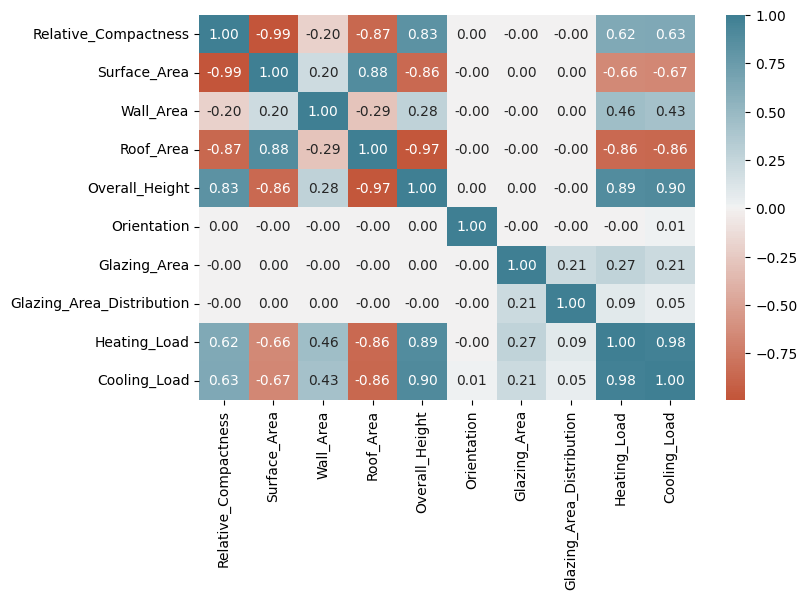

In [25]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f')

### Selección de atributos. Separación en entrenamiento y prueba. Normalización de valores

In [26]:
# elimina atributos redundantes
X = np.array(df.drop(['Heating_Load','Cooling_Load', 'Relative_Compactness', 'Overall_Height'],axis=1))

# Y= df[['Heating Load']]
Y= np.array(df['Cooling_Load'])

# Separa datos en grupo de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 20)

data_scaler = StandardScaler()
# data_scaler = MinMaxScaler()

X_train = data_scaler.fit_transform(X_train)
X_test = data_scaler.transform(X_test)

### Construccion del Modelo

In [27]:
# Configuración
MAX_ITER = 1000
ALFA = 0.01
TAM_LOTE = 64
ACTIVACION = 'sigmoid'  # 'sigmoid', 'tanh' o 'linear' para 'identity'
OPTIMIZADOR = 'adam'  # 'sgd, 'adam'

# Selección de optimizador
if OPTIMIZADOR == 'sgd':
    optimizer = SGD(learning_rate=ALFA)
elif OPTIMIZADOR == 'adam':
    optimizer = Adam(learning_rate=ALFA)

# Creación del modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(30, activation=ACTIVACION),
    Dense(15, activation=ACTIVACION),
    Dense(1)
])

# Compilación del modelo
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(
    X_train, Y_train,
    epochs=MAX_ITER,
    batch_size=TAM_LOTE,
    validation_split=0.20,
    verbose=1
)

# Número de iteraciones realizadas
print('Iteraciones realizadas:', len(history.epoch))


Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 646.5900 - val_loss: 513.7391
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 559.9755 - val_loss: 448.8036
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 477.8316 - val_loss: 404.3539
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 462.5032 - val_loss: 370.4359
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 416.7487 - val_loss: 340.3180
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 427.4824 - val_loss: 310.4459
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 351.4783 - val_loss: 283.5693
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 341.1827 - val_loss: 259.7784
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 308.2805 - val_loss: 238.4921
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 293.1672 - val_loss: 219.3622
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 263.8105 - val_loss: 202.2961
Epoch 12/1000
7/7 ━

### Gráfico con evolución de curva de perdida

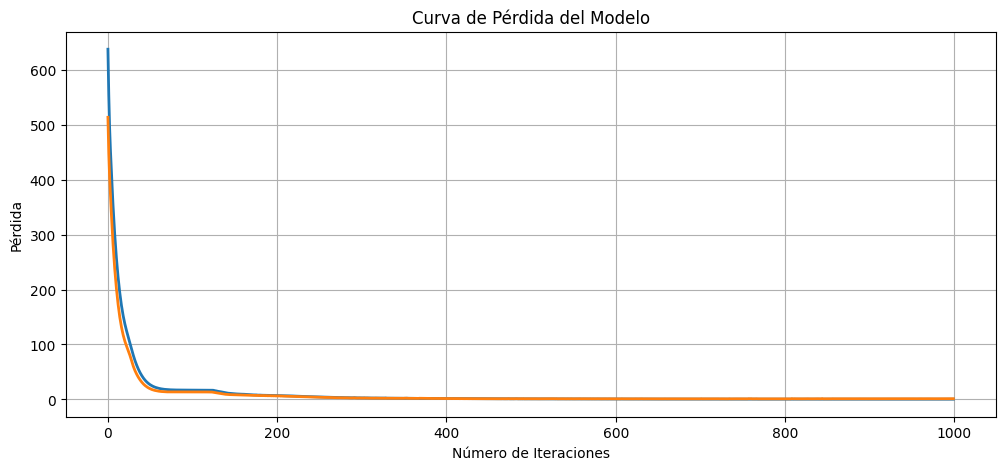

In [28]:
loss_curve = history.history['loss'] # curva de pérdida del modelo
val_loss_curve = history.history['val_loss'] # curva de pérdida del modelo

# Dibuja curva de pérdida
plt.figure(figsize=(12, 5))
plt.plot(loss_curve, linewidth=2)
plt.plot(val_loss_curve, linewidth=2)
plt.title('Curva de Pérdida del Modelo')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

### Metricas

**Coeficiente de Determinación $R^2$**

El coeficiente de determinación $R^2$ mide qué tan bien un modelo de regresión se ajusta a los datos. La fórmula es:

$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$

donde:

- $ y_i $: Valor real de la muestra $ i $.
- $ \hat{y}_i $: Valor predicho por el modelo para la muestra $i$.
- $ \bar{y} $: Promedio de los valores reales $ y_i $.
- $ n $: Número total de muestras.

En esta fórmula:

1. **El numerador** $ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ representa el **error cuadrático** entre los valores reales y los predichos por el modelo.

2. **El denominador** $ \sum_{i=1}^{n} (y_i - \bar{y})^2 $ representa la **variación total de los datos** respecto a la media.

#### El valor de $ R^2 $ indica qué porcentaje de la variación de los datos es explicada por el modelo:

- $ R^2 = 1 $: El modelo explica perfectamente los datos.
- $ R^2 = 0 $: El modelo no explica mejor que una media simple de los datos.
- $ R^2 < 0 $: El modelo es peor que una media simple de los datos (sucede en algunos modelos que no ajustan bien).




In [29]:
# Realizar predicciones
Y_pred = model.predict(X_test)

# Calcular métricas de evaluación usando las predicciones (Y_pred) y los valores reales (Y_test)
mae = mean_absolute_error(Y_test, Y_pred)  # Calcular el error absoluto medio
mse = mean_squared_error(Y_test, Y_pred)   # Calcular el error cuadrático medio
rmse = np.sqrt(mse)                        # Calcular la raíz del error cuadrático medio
r2 = r2_score(Y_test, Y_pred)              # Calcular el coeficiente de determinación

print(f"    Mean Absolute Error: {mae}")
print(f"     Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"     R-squared r2_score: {r2}")

# R2 (R cuadrado) es la proporción de varianza en la variable dependiente que es predecible a
# partir de las independientes en un modelo de regresión. R2=1 significa que el modelo explica el
# 100% de la variabilidad en los datos

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
    Mean Absolute Error: 0.7576480981075404
     Mean Squared Error: 1.5062199487021226
Root Mean Squared Error: 1.2272815278908595
     R-squared r2_score: 0.9833444814022014
